# Análise Exploratória (EDA)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import itertools


In [4]:
df_sus = pd.read_csv('../data/opendatasus/opendatasus.csv', encoding='latin1', sep=';', low_memory=False)
df_estacoes = pd.read_csv('../data/estacoes_monitorar/estacoes.csv', encoding='utf_8_sig', sep=';', low_memory=False)
df_medidas_jan_mar = pd.read_csv('../data/medidas_monitorar/medidas_jan_mar.csv', encoding='latin1', sep=';', low_memory=False)
df_medidas_abr_jun = pd.read_csv('../data/medidas_monitorar/medidas_abr_jun.csv', encoding='latin1', sep=';', low_memory=False)
df_medidas_jul_nov = pd.read_csv('../data/medidas_monitorar/medidas_jul_nov.csv', encoding='latin1', sep=';', low_memory=False)

In [5]:
# Useful columns 
df_sus = df_sus[['DT_SIN_PRI', 'CS_SEXO', 'DT_NASC', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'CO_MUN_RES', 
                'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA']]

df_estacoes = df_estacoes[['Código IBGE do Município', 'Nome do Município', 'Estado', 'ID da Estação', 'Nome da Estação', 'Latitude', 'Longitude']]

df_medidas = pd.concat([df_medidas_jan_mar,df_medidas_abr_jun, df_medidas_jul_nov])

df_medidas = df_medidas[['Nome do Município', 'Estado', 'Nome da Estação', 'Item_monitorado', 'Sigla', 'Concentracao', 'iqar']]

In [6]:
# Renaming columns datasus
df_sus.columns = df_sus.columns.str.lower()


In [7]:
# Renaming columns df_estacoes
new_names = ['codigo_mun', 'nome_mun', 'uf', 'id_estacao', 'nome_estacao', 'latitude', 'longitude']
dict_names = {}

for i, j in zip(df_estacoes.columns, new_names):
    dict_names[i] = j

df_estacoes.rename(columns=dict_names, inplace=True)

In [8]:
# Renaming column df_medidas
new_names = ['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla', 'concentracao', 'iqar']
dict_names = {}

for i, j in zip(df_medidas.columns, new_names):
    dict_names[i] = j

df_medidas.rename(columns=dict_names, inplace=True)

In [9]:
df_sus.head()

,dt_sin_pri,cs_sexo,dt_nasc,cs_raca,cs_escol_n,sg_uf,id_mn_resi,co_mun_res,classi_fin,criterio,evolucao,dt_evoluca
0,2019-12-29,F,1967-12-06,NaN,NaN,SP,CATANDUVA,351110.0,4.0,1.0,1.0,2020-01-04
1,2019-12-29,F,2000-12-13,2.0,2.0,RS,SAO JOSE DOS AUSENTES,431862.0,4.0,1.0,1.0,2020-04-05
2,2019-12-30,M,2019-05-17,9.0,5.0,SP,SAO PAULO,355030.0,1.0,1.0,1.0,2020-01-06
3,2019-12-30,M,2017-08-22,2.0,5.0,PR,FOZ DO IGUACU,410830.0,2.0,1.0,1.0,2020-01-02
4,2019-12-29,F,2019-07-22,1.0,5.0,PR,FOZ DO IGUACU,410830.0,2.0,1.0,1.0,2020-01-05


### DFS:

* df_sus: Dados do OpenDataSUS apenas com as colunas que vamos utilizar para a análise
    - Colunas:
        - Data dos primeiros sintomas (dt_sin_pri)
        - Sexo (Masculino ou Femino) (cs_sexo)
            - 1: Masculino
            - 2: Feminino
            - 3: Ignorado
        - Data de Nascimento (dt_nasc)
        - Raca (cs_raca)
            - 1: Branca
            - 2: Preta
            - 3: Amarela
            - 4: Parda
            - 5: Indígena
            - 9: Ignorado 
        - Nivel de escolaridade (cs_escol_n)
            - 0: Sem Escolaridade/Analfabeto
            - 1: Fundamental 1º ciclo (1ª a 5ª série)
            - 2: Fundamental 2º ciclo (6ª a 9ª série)
            - 3: Médio (1º ao 3º ano)
            - 4: Superior
            - 5: Não se aplica
            - 9: Ignorado
        - UF de moradia (sg_uf)
        - Nome do município de residência (id_mn_resi)
        - ID IBGE do município (co_mun_res)
        - Classificação final do caso (classi_fin)
            - 1: SRAG por Influenza
            - 2: SRAG por outro vírus resporatório
            - 3: SRAG por outro agente etiológico
            - 4: SRAG não especificado
            - 5: SRAG por covid-19
        - Criterio adotado para evolução do caso (criterio)
            - 1: Laboratorial
            - 2: Clínico Epidemiológico
            - 3: Clínico
            - 4: Clínico imagem
        - Evolução do caso, se deu alta ou óbito (evolucao)
            - 1: Cura
            - 2: Óbito
            - 3: Óbito por outras causas
            - 9: Ignorado
        - Data da evolucao (dt_evolucao)

* df_medidas: medidas do MonitorAr

* df_estacoes: dados sobre as estacoes
    - Código do munícipio de acordo com IBGE (codigo_mun)
    - Nome do município (nome_mun)
    - Estado de localização (uf)
    - ID da estação (id_estacao)
    - Nome da estação (nome_estacao)
    - Latitude e longitude da localizacação (latitude e longitude)

In [10]:
# Veryfing null/na columns
sus_null_columns = df_sus.isna().sum()
sus_null_columns


dt_sin_pri         0
cs_sexo            0
dt_nasc         2139
cs_raca        43310
cs_escol_n    359611
sg_uf            113
id_mn_resi       113
co_mun_res       113
classi_fin     32862
criterio       55277
evolucao       76522
dt_evoluca    152891
dtype: int64

In [11]:
medidas_null_columns  = df_medidas.isnull().sum()
medidas_null_columns

nome_mun                 0
uf                       0
nome_estacao             0
item_monitorado          0
sigla                    0
concentracao             0
iqar               1045240
dtype: int64

In [12]:
estacoes_null_columns = df_estacoes.isnull().sum()
estacoes_null_columns

codigo_mun      0
nome_mun        0
uf              0
id_estacao      0
nome_estacao    0
latitude        0
longitude       0
dtype: int64

In [13]:
df_sus['dt_sin_pri'] = pd.to_datetime(df_sus['dt_sin_pri'])
df_sus['dt_nasc'] = pd.to_datetime(df_sus['dt_nasc'])

In [14]:
df_sus['idade'] = (df_sus['dt_sin_pri'] - df_sus['dt_nasc']).dt.days // 365

In [15]:
df_sus['idade'].isna().sum()

np.int64(2139)

In [16]:
df_sus.dropna(subset=['idade'], inplace=True)

In [17]:
df_sus['idade'].isna().sum()

np.int64(0)

In [18]:
df_sus['cs_sexo'].dropna()

0          F
1          F
2          M
3          M
4          F
          ..
1206915    F
1206916    M
1206917    M
1206918    M
1206919    F
Name: cs_sexo, Length: 1204781, dtype: object

In [19]:
df_sus['cs_sexo'].isnull().sum()

np.int64(0)

In [20]:
def faixa_etaria(idade):
    '''
        Função que recebe a idade e de acordo com isso, fornece em qual faixa etária o indivíduo se encaixa:
            Criança (0 -13 anos)
            Adolescente (13 - 17 anos)
            Adulto (18 - 64 anos)
            Idosos ( >= 65 anos)
    '''
    if idade >= 0 and idade < 13:
        return'crianca'
    elif idade >= 13 and idade < 18:
        return 'adolescente'
    elif idade >= 18 and idade < 65:
        return 'adulto'
    else:
        return 'idoso'

In [21]:
# Criando a coluna faixa etária para analisar
df_sus['faixa_etaria'] = df_sus['idade'].apply(faixa_etaria)

In [22]:
# Verificando se há valores nulos
df_sus['classi_fin'].isnull().sum()

np.int64(32789)

In [23]:
# Dropando valores nulos da classificação final
df_sus.dropna(subset=['classi_fin'], inplace=True)

In [24]:
# Transformando a classificação final do tipo string para inteiro
df_sus['classi_fin'] = df_sus['classi_fin'].astype(int)

In [25]:
# Filter only rows with classi_fin > 0
filtered_df = df_sus[df_sus['classi_fin'] > 0]

# Create the key by combining faixa_etaria and sexo
filtered_df['key'] = filtered_df['faixa_etaria'] + filtered_df['cs_sexo'].map({'M': 'masculino', 'F': 'feminino'})

# Count occurrences of each key
final_dict = filtered_df['key'].value_counts().to_dict()

In [26]:
final_dict

{'adultomasculino': 334365,
 'adultofeminino': 258905,
 'idosomasculino': 254525,
 'idosofeminino': 240841,
 'criancamasculino': 41159,
 'criancafeminino': 32446,
 'adolescentefeminino': 5239,
 'adolescentemasculino': 4227}

In [27]:

# Extrair faixas etárias únicas (ordenadas)
faixas_etarias = sorted(list(set([k.split('feminino')[0].split('masculino')[0] for k in final_dict.keys()])))

# Inicializar arrays para homens e mulheres
men_bins = np.zeros(len(faixas_etarias))
women_bins = np.zeros(len(faixas_etarias))

# Preencher os arrays
for i, faixa in enumerate(faixas_etarias):
    men_bins[i] = final_dict.get(faixa + 'masculino', 0)
    women_bins[i] = -final_dict.get(faixa + 'feminino', 0)  # Negativo para mulheres

# Layout do gráfico
layout = go.Layout(
    yaxis=go.layout.YAxis(title='Faixa Etária'),
    xaxis=go.layout.XAxis(
        range=[-max(men_bins)*1.1, max(men_bins)*1.1],  # Ajuste automático
        tickvals=[-1000, -700, -300, 0, 300, 700, 1000],  # Personalize conforme seus dados
        ticktext=['1000', '700', '300', '0', '300', '700', '1000'],
        title='Número de Casos'
    ),
    barmode='overlay',
    bargap=0.1,
    title='Pirâmide Etária de Casos (SUS)'
)

# Dados para o gráfico
data = [
    go.Bar(
        y=faixas_etarias,
        x=men_bins,
        orientation='h',
        name='Masculino',
        hoverinfo='x',
        marker=dict(color='powderblue')
    ),
    go.Bar(
        y=faixas_etarias,
        x=women_bins,
        orientation='h',
        name='Feminino',
        text=-1 * women_bins.astype('int'),  # Mostrar valores absolutos
        hoverinfo='text',
        marker=dict(color='seagreen')
    )
]

# Mostrar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

In [28]:
for i, faixa in enumerate(faixas_etarias):
    men_bins[i] = final_dict.get(faixa + 'masculino', 0)
    women_bins[i] = final_dict.get(faixa + 'feminino', 0)  # Negativo para mulheres

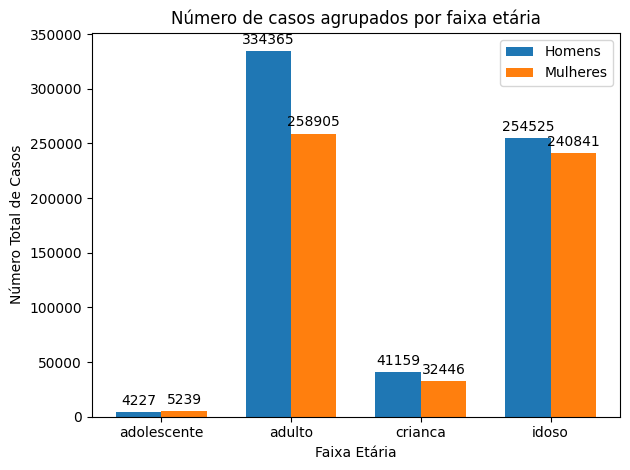

In [29]:
labels = sorted(list(set([k.split('feminino')[0].split('masculino')[0] for k in final_dict.keys()])))
x = np.arange(len(men_bins))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_bins, width, label='Homens')
rects2 = ax.bar(x + width/2, women_bins, width, label='Mulheres')

ax.set_ylabel('Número Total de Casos')
ax.set_xlabel('Faixa Etária')
ax.set_title('Número de casos agrupados por faixa etária')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [30]:
df_sus['sg_uf'].unique()

array(['SP', 'RS', 'PR', 'GO', 'PE', 'SC', 'RJ', 'TO', 'MG', 'DF', 'AM',
       'ES', 'CE', 'BA', 'SE', 'MS', 'PA', 'AC', 'MT', 'PI', 'PB', 'RO',
       'RN', 'RR', nan, 'MA', 'AL', 'AP'], dtype=object)

In [31]:
def juntando_numero_casos_por_uf(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['sg_uf']

        result_dict[key] = result_dict.get(key, 0) + 1
    
    return result_dict

In [32]:
# Exclui linhas com uf null
df_sus.dropna(subset=['sg_uf'], inplace=True)

In [33]:
final_dict = juntando_numero_casos_por_uf(df_sus)

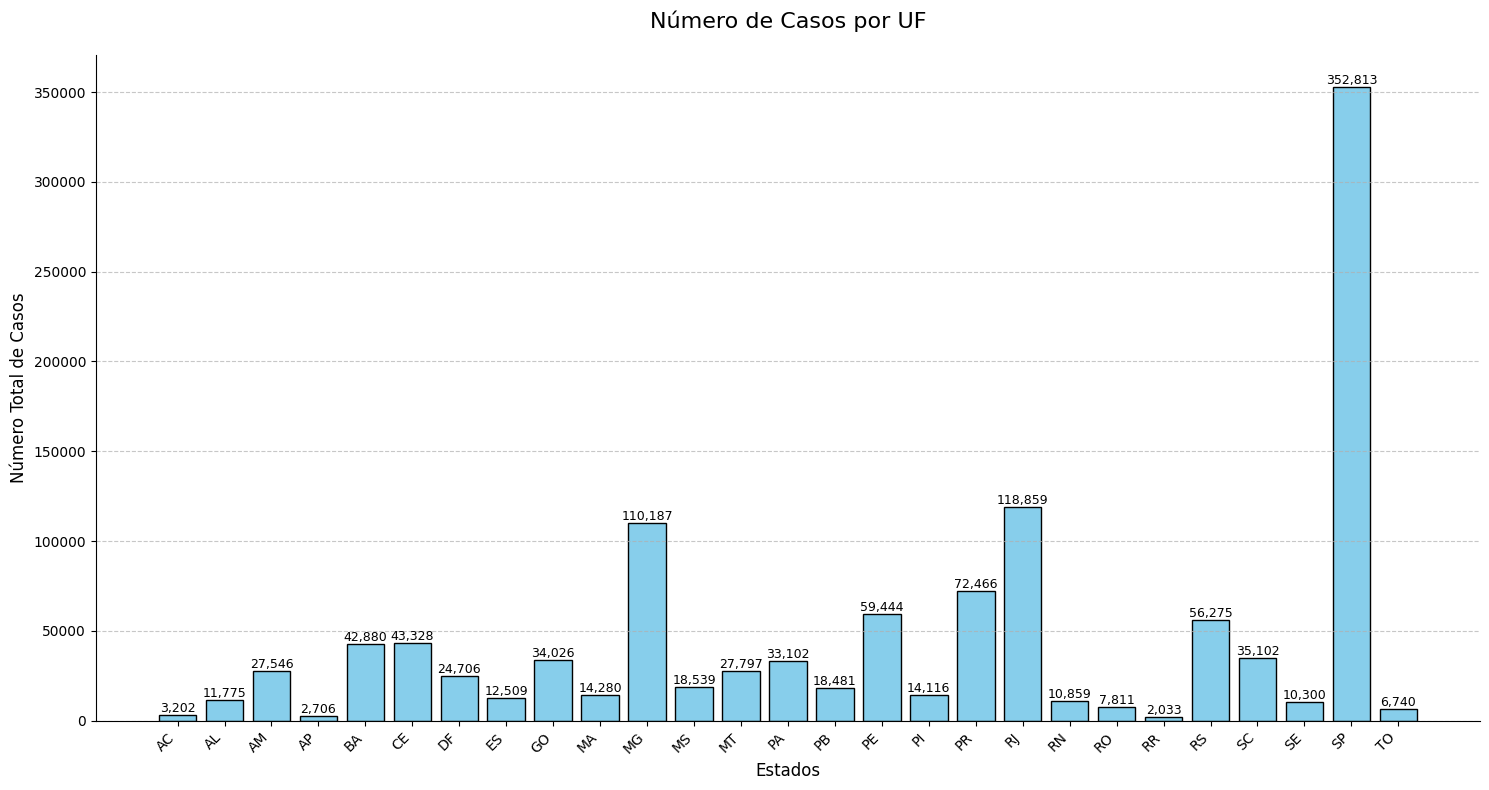

In [34]:
# Ordenar os estados e valores
labels = sorted(final_dict.keys())
values = [final_dict[uf] for uf in labels]

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Número de Casos por UF', fontsize=16, pad=20)
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Número Total de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

In [35]:
# Evolução mensal dos casos
df_sus['mes'] = df_sus['dt_sin_pri'].dt.month_name(locale='pt_BR.utf8')

In [36]:
def juntanto_numero_casos_por_mes(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['mes']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [37]:
dict_mes = juntanto_numero_casos_por_mes(df_sus)

In [38]:
dict_mes

{'Dezembro': 134188,
 'Janeiro': 14663,
 'Abril': 105746,
 'Março': 40317,
 'Fevereiro': 3223,
 'Maio': 149673,
 'Julho': 151435,
 'Novembro': 114341,
 'Agosto': 127366,
 'Junho': 146991,
 'Outubro': 86720,
 'Setembro': 97219}

In [39]:
ordem_meses = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril',
    'Maio', 'Junho', 'Julho', 'Agosto',
    'Setembro', 'Outubro', 'Novembro', 'Dezembro'
]

# Ordena as chaves
chaves_ordenadas = sorted(
    dict_mes.keys(),
    key=lambda mes: ordem_meses.index(mes)
)

# Cria novo dicionário ordenado
dict_ordenado = {mes: dict_mes[mes] for mes in chaves_ordenadas}
# Saída: {'janeiro': 5, 'março': 10, 'agosto': 3, 'dezembro': 8}

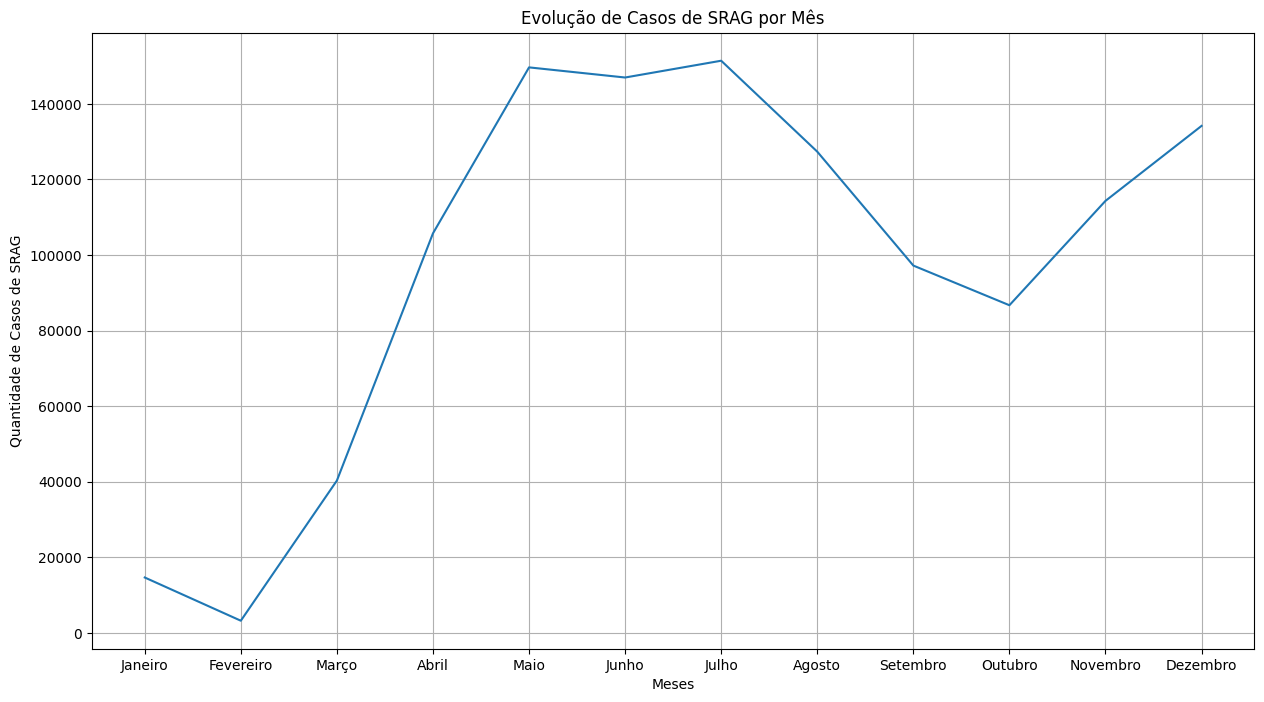

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dict_ordenado.keys(), dict_ordenado.values())

ax.set(xlabel='Meses', ylabel='Quantidade de Casos de SRAG',
       title='Evolução de Casos de SRAG por Mês')
ax.grid()
plt.show()

In [41]:
# Número de casos por doença
def juntando_numero_casos_por_doenca(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['classi_fin']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [42]:
dict_doenca = juntando_numero_casos_por_doenca(df_sus)

- 1: SRAG por Influenza
- 2: SRAG por outro vírus resporatório
- 3: SRAG por outro agente etiológico
- 4: SRAG não especificado
- 5: SRAG por covid-19

In [43]:
def renomear_chaves(dicionario, mapa_renomeacao):
    """
    Renomeia chaves de um dicionário.

    Args:
        dicionario: O dicionário cujas chaves serão renomeadas.
        mapa_renomeacao: Um dicionário que mapeia as chaves originais para as novas chaves.

    Returns:
        Um novo dicionário com as chaves renomeadas.
    """
    novo_dicionario = {}
    for chave_original, valor in dicionario.items():
        nova_chave = mapa_renomeacao.get(chave_original, chave_original)
        novo_dicionario[nova_chave] = valor
    return novo_dicionario

In [44]:
dict_doenca_ordenado = dict(sorted(dict_doenca.items()))

mapa_renomeacao = {1: 'SRAG Por Influenza',
                   2: 'SRAG por outro vírus respiratório',
                   3: 'SRAG por outro agente etiológico',
                   4: 'SRAG não especificado',
                   5: 'SRAG por covid-19'}
dict_doenca = renomear_chaves(dict_doenca_ordenado, mapa_renomeacao)

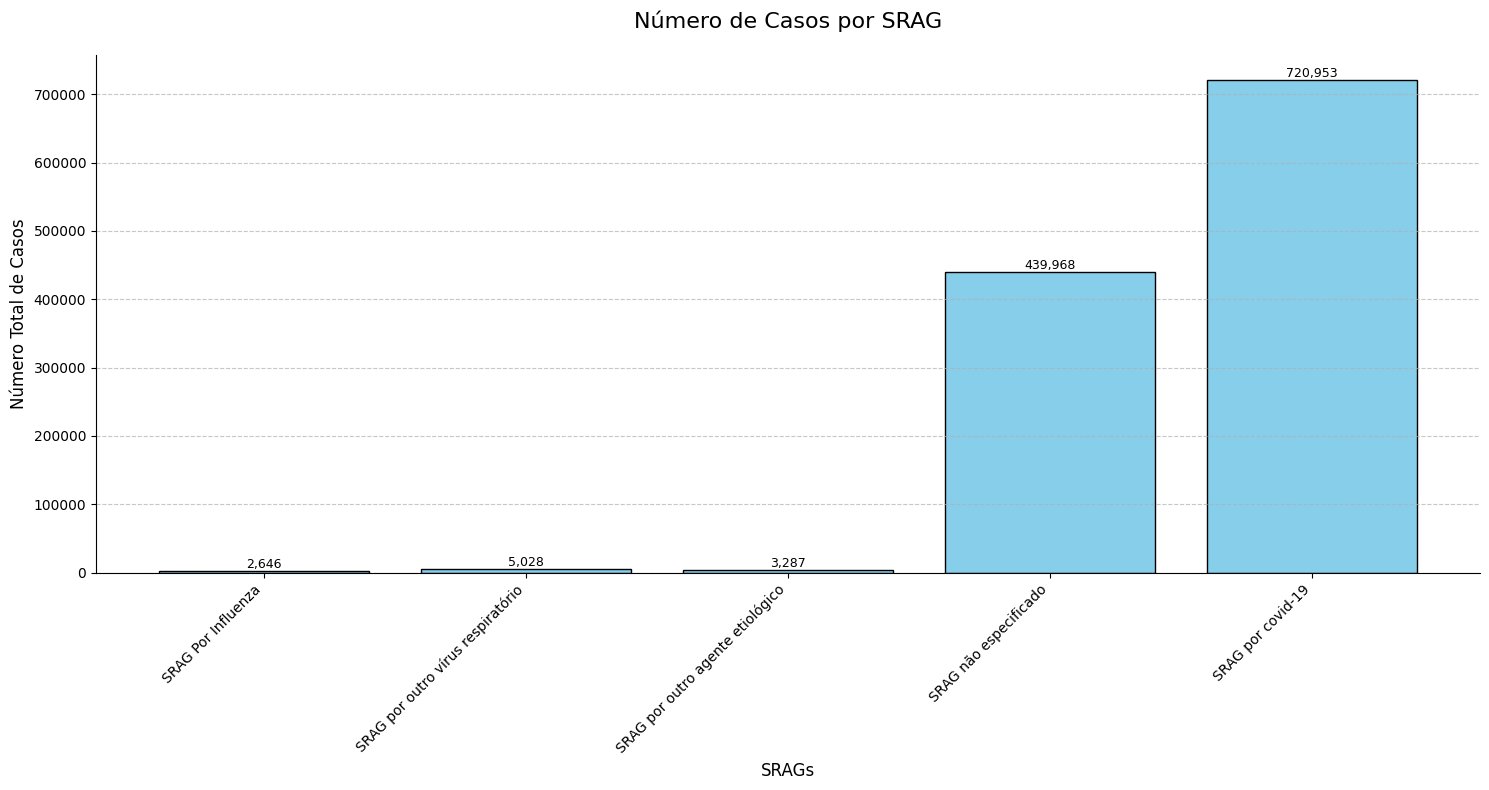

In [45]:
# Ordenar os estados e valores
labels = list(dict_doenca.keys())
values = list(dict_doenca.values())

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Número de Casos por SRAG', fontsize=16, pad=20)
plt.xlabel('SRAGs', fontsize=12)
plt.ylabel('Número Total de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

### Análise sobre os dados de medidas

In [46]:
# Interligando os dados
# Vendo quais cidades tem em ambos os datasets

tamanho_max = 6

df_estacoes['codigo_mun'] = df_estacoes['codigo_mun'].astype(str)

df_estacoes['codigo_mun'] = df_estacoes['codigo_mun'].apply(lambda x: x[:tamanho_max])

df_estacoes['codigo_mun'] = df_estacoes['codigo_mun'].astype(int)

In [47]:
df_medidas.columns

Index(['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla',
       'concentracao', 'iqar'],
      dtype='object')

In [50]:
# Concentração total de todos os poluentes
def agrupando_por_poluente(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['sigla']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [51]:
dict_poluentes = agrupando_por_poluente(df_medidas)

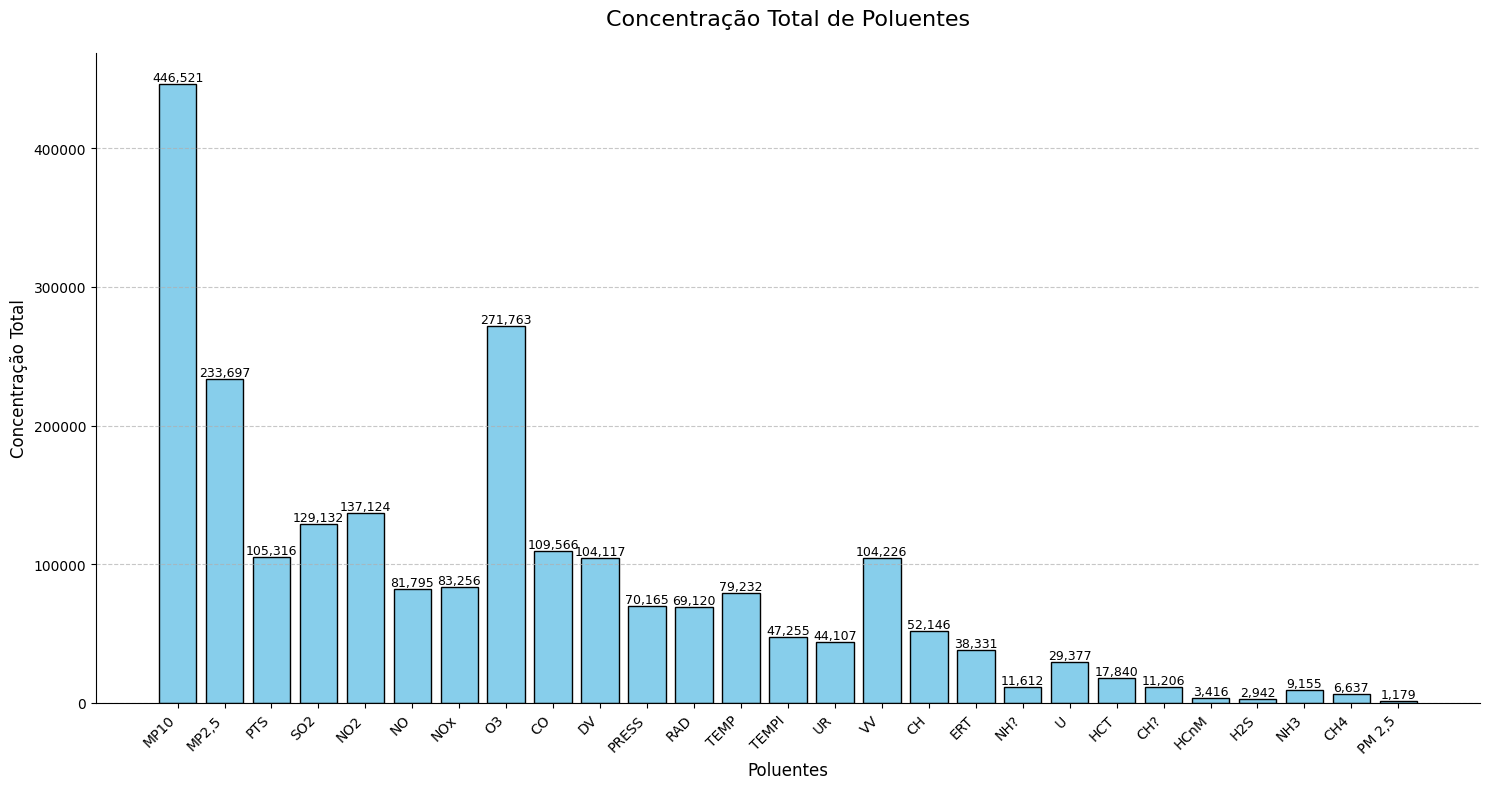

In [ ]:
# Ordenar os estados e valores
labels = list(dict_poluentes.keys())
values = list(dict_poluentes.values())

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Concentração Total de Poluentes', fontsize=16, pad=20)
plt.xlabel('Poluentes', fontsize=12)
plt.ylabel('Concentração Total', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

## Se for utilizar, dar um sort pela quantidade de concentração total (melhor visualização)

In [54]:
df_medidas.columns

Index(['nome_mun', 'uf', 'nome_estacao', 'item_monitorado', 'sigla',
       'concentracao', 'iqar'],
      dtype='object')

In [55]:
# Cidades com maiores concentrações
# Concentração total de todos os poluentes
def agrupando_por_poluente_cidade(df):
    result_dict = {}

    for _, row in df.iterrows():
        key = row['nome_mun']

        result_dict[key] = result_dict.get(key, 0) + 1

    return result_dict

In [57]:
dict_pol_cidade = agrupando_por_poluente_cidade(df_medidas)

In [64]:
dict_pol_cidade_ordenado = dict(sorted(dict_pol_cidade.items(), key=lambda item: item[1], reverse=True))

In [65]:
dict_pol_cidade_ordenado

{'Rio de Janeiro': 520817,
 'Camaçari': 278540,
 "Dias d'Ávila": 251901,
 'São Paulo': 116303,
 'Congonhas': 87312,
 'Três Lagoas': 85804,
 'São Sebastião do Passé': 81416,
 'Itabira': 47082,
 'Vitória': 44132,
 'Ipatinga': 43861,
 'Conceição do Mato Dentro': 33056,
 'Paracatu': 32124,
 'Barra Longa': 31462,
 'Vila Velha': 30357,
 'Serra': 28358,
 'Belo Horizonte': 26075,
 'Timóteo': 25347,
 'Betim': 25073,
 'Campinas': 19997,
 'São José da Lapa': 19562,
 'Brumadinho': 19427,
 'Cubatão': 18999,
 'Guaíba': 17329,
 'Esteio': 15821,
 'Rio Doce': 15746,
 'Canoas': 14878,
 'Paulínia': 14863,
 'Guarulhos': 14852,
 'Santos': 14522,
 'São José dos Campos': 14213,
 'Santo André': 14004,
 'São Bernardo do Campo': 13376,
 'Cariacica': 13011,
 'Ibirité': 11692,
 'Triunfo': 9848,
 'Ouro Preto': 8254,
 'Pirapora': 7796,
 'Limeira': 7567,
 'Carapicuíba': 7542,
 'Araçatuba': 7492,
 'Sorocaba': 7485,
 'Araucária': 7467,
 'Presidente Prudente': 7452,
 'Marília': 7428,
 'Catanduva': 7417,
 'Bauru': 7398,

In [67]:
top10_cidades = dict(itertools.islice(dict_pol_cidade_ordenado.items(), 10))

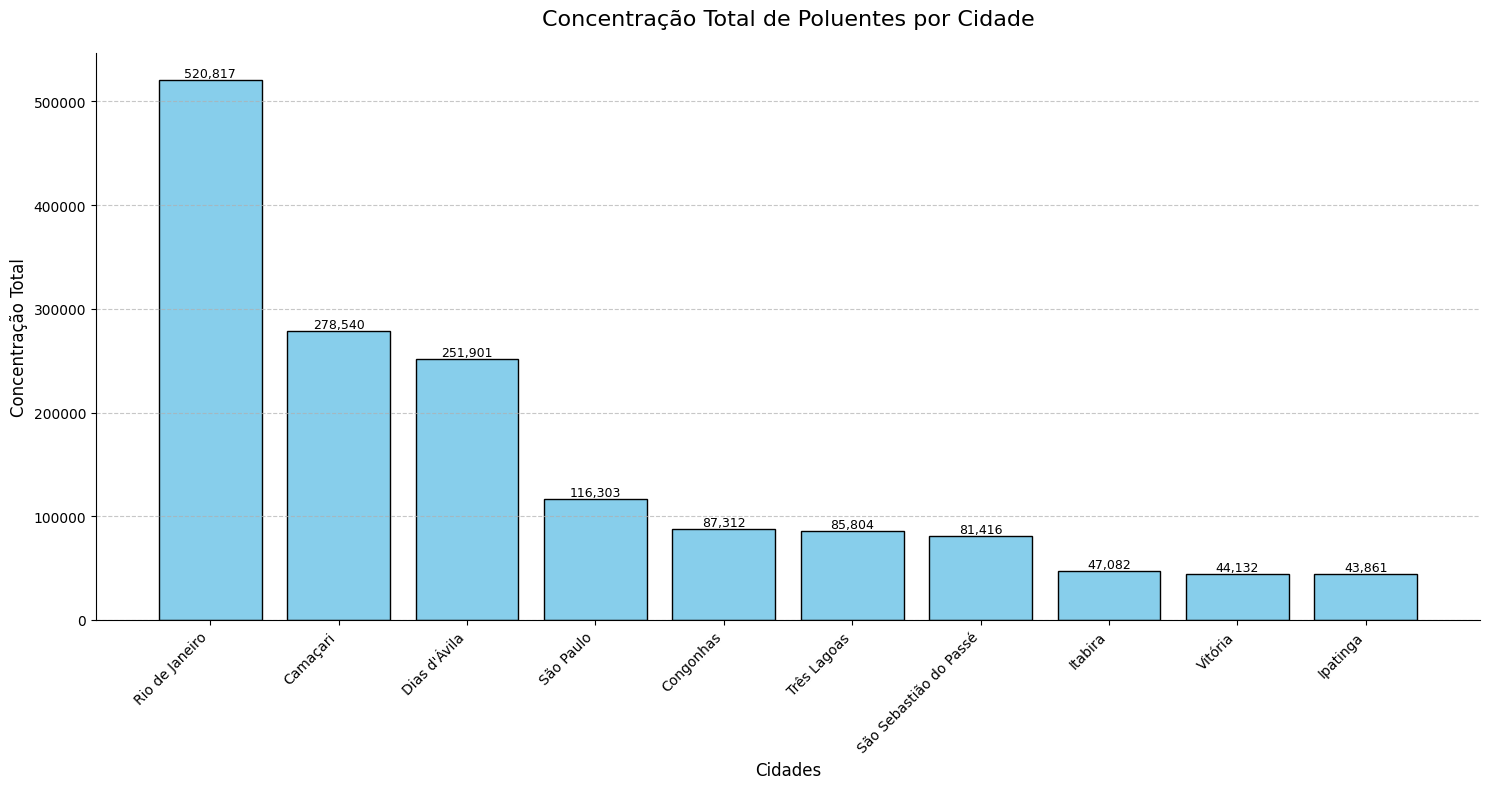

In [69]:
# Ordenar os estados e valores
labels = list(top10_cidades.keys())
values = list(top10_cidades.values())

# Configurações do gráfico
plt.figure(figsize=(15, 8))  # Tamanho aumentado
bars = plt.bar(labels, values, color='skyblue', edgecolor='black')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height:,}',  # Formato com separador de milhares
        ha='center', 
        va='bottom',
        fontsize=9
    )

# Ajustes estéticos
plt.title('Concentração Total de Poluentes por Cidade', fontsize=16, pad=20)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('Concentração Total', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grades horizontais

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()
